In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets.CIFAR10
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:


class VGG(nn.Module):
    def __init__(self, input_channels, num_classes, weight_decay):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Dropout(0.3),

            nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Dropout(0.4),

            nn.Conv2d(128, 128, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Dropout(0.4),

            nn.Conv2d(256, 256, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Dropout(0.4),

            nn.Conv2d(256, 256, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),

            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),

            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),

            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),

            nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Flatten(),
            nn.Linear(512, 512, bias=False),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 标准化
def standardization(x_train, x_test):
    mean = torch.mean(x_train, dim=(0, 2, 3))
    std = torch.std(x_train, dim=(0, 2, 3))
    x_train = (x_train - mean.view(1, -1, 1, 1)) / (std.view(1, -1, 1, 1) + 1e-7)
    x_test = (x_test - mean.view(1, -1, 1, 1)) / (std.view(1, -1, 1, 1) + 1e-7)
    return x_train, x_test

# 归一化
def normalize(x_train, x_test):
    x_train_max, _ = torch.max(x_train, dim=(0, 2, 3), keepdim=True)
    x_train_min, _ = torch.min(x_train, dim=(0, 2, 3), keepdim=True)
    x_test_max, _ = torch.max(x_test, dim=(0, 2, 3), keepdim=True)
    x_test_min, _ = torch.min(x_test, dim=(0, 2, 3), keepdim=True)
    x_train = (x_train - x_train_min) / (x_train_max - x_train_min + 1e-7)
    x_test = (x_test - x_test_min) / (x_test_max - x_test_min + 1e-7)
    return x_train, x_test


In [3]:


# 训练参数
batch_size = 128
max_epochs = 100
learning_rate = 0.01
lr_decay = 1e-6
lr_drop = 20
num_classes = 10
weight_decay = 0.0005
x_shape = [32, 32, 3]

# 加载数据
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

x_train, x_val, y_train, y_val = train_test_split(
    train_dataset.data, train_dataset.targets, test_size=0.1, random_state=42)

x_train, x_val = normalize(x_train, x_val)

train_loader = DataLoader(TensorDataset(torch.Tensor(x_train), torch.LongTensor(y_train)),
                          batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(torch.Tensor(x_val), torch.LongTensor(y_val)),
                        batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(torch.Tensor(test_dataset.data), torch.LongTensor(test_dataset.targets)),
                         batch_size=batch_size, shuffle=False)

# 动态学习率
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))

# 数据增强
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

train_dataset_augmented = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
train_loader_augmented = DataLoader(train_dataset_augmented, batch_size=batch_size, shuffle=True)

# 模型搭建
model = VGG(input_channels=x_shape[2], num_classes=num_classes, weight_decay=weight_decay)

# 优化器设置
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
scheduler = MultiStepLR(optimizer, milestones=[lr_drop], gamma=0.5)

# 损失函数和评价指标
criterion = nn.CrossEntropyLoss()

# 训练和验证
for epoch in range(max_epochs):
    model.train()
    for inputs, labels in train_loader_augmented:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f'Epoch {epoch + 1}/{max_epochs}, '
          f'Loss: {val_loss/len(val_loader):.4f}, '
          f'Accuracy: {100 * correct / total:.2f}%')

    scheduler.step()

# 测试
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


170498071/170498071 [==============================] - 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:

# 定义模型、优化器、损失函数等
model = VGG(input_channels=x_shape[2], num_classes=num_classes, weight_decay=weight_decay)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
scheduler = MultiStepLR(optimizer, milestones=[lr_drop], gamma=0.5)
criterion = nn.CrossEntropyLoss()

# 转换数据为PyTorch的TensorDataset
train_dataset = TensorDataset(torch.Tensor(x_train), torch.LongTensor(y_train))
test_dataset = TensorDataset(torch.Tensor(x_test), torch.LongTensor(y_test))

# 转换数据为PyTorch的DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 训练模型
for epoch in range(max_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f'Epoch {epoch + 1}/{max_epochs}, '
          f'Loss: {val_loss/len(test_loader):.4f}, '
          f'Accuracy: {100 * correct / total:.2f}%')

    scheduler.step()

# 保存模型
torch.save(model.state_dict(), './vgg.pth')


Epoch 1/100


<ipython-input-4-961213a45ca2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),


390/390 [==============================] - ETA: 0s - loss: 4.9798 - accuracy: 0.2125
Epoch 1: val_accuracy improved from -inf to 0.18950, saving model to ./vgg.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


390/390 [==============================] - 61s 118ms/step - loss: 4.9798 - accuracy: 0.2125 - val_loss: 4.9081 - val_accuracy: 0.1895 - lr: 0.0100
Epoch 2/100
390/390 [==============================] - ETA: 0s - loss: 4.4841 - accuracy: 0.3034
Epoch 2: val_accuracy improved from 0.18950 to 0.27210, saving model to ./vgg.h5
390/390 [==============================] - 42s 108ms/step - loss: 4.4841 - accuracy: 0.3034 - val_loss: 4.5139 - val_accuracy: 0.2721 - lr: 0.0100
Epoch 3/100
390/390 [==============================] - ETA: 0s - loss: 4.1612 - accuracy: 0.3718
Epoch 3: val_accuracy improved from 0.27210 to 0.35870, saving model to ./vgg.h5
390/390 [==============================] - 42s 106ms/step - loss: 4.1612 - accuracy: 0.3718 - val_loss: 4.1421 - val_accuracy: 0.3587 - lr: 0.0100
Epoch 4/100
390/390 [==============================] - ETA: 0s - loss: 3.9062 - accuracy: 0.4246
Epoch 4: val_accuracy improved from 0.35870 to 0.42070, saving model to ./vgg.h5
390/390 [================

313/313 [==============================] - 3s 10ms/step - loss: 0.7006 - accuracy: 0.8962
Test loss: 0.7006407976150513
Test accuracy: 0.8962000012397766


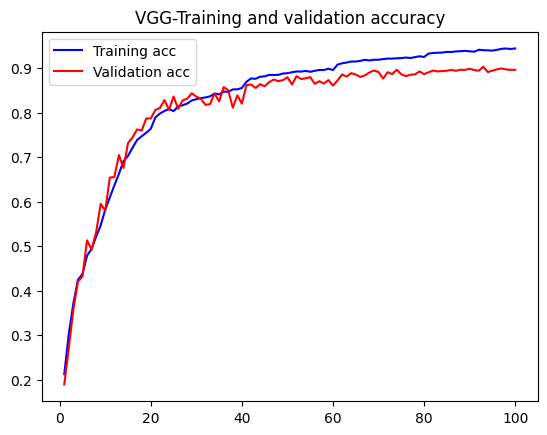

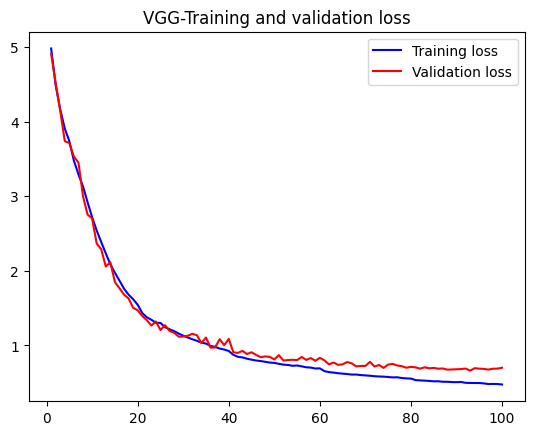

In [8]:
import matplotlib.pyplot as plt
#输出准确率
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy:.2f}%')

print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

# 绘图
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('VGG-Training and validation accuracy')
plt.legend()
plt.savefig("vgg_accuracy.png")
plt.figure() # 新建一个图
plt.plot(epochs, train_loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('VGG-Training and validation loss')
plt.legend()
plt.savefig("vgg_loss.png")